In [1]:
!pip install pandas numpy matplotlib statsmodels requests


## -->In Below code, we have set our API key and the stock symbols we want to retrieve data for. We have also set the date range for the data we want to retrieve. We then loop through each stock symbol and fetch the data using the Quandl API. We convert the retrieved data into a Pandas DataFrame, set the index to be the date column, and extract the "Close" column.



In [2]:



import pandas as pd
import requests

# Set your API key
API_KEY = "1fcx7Z8Lo29RS6dePvzH"

# Set the stock symbols
stocks = ["AAPL", "GOOG", "AMZN", "MSFT"]

# Set the date range for the data
start_date = "2016-01-01"
end_date = "2021-12-31"

# Fetch the data for each stock using the Quandl API
data = {}
for stock in stocks:
    url = f"https://www.quandl.com/api/v3/datasets/WIKI/{stock}.json?start_date={start_date}&end_date={end_date}&api_key={API_KEY}"
    response = requests.get(url)
    json_data = response.json()["dataset"]
    df = pd.DataFrame(json_data["data"], columns=json_data["column_names"])
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
    data[stock] = df["Close"]


In [3]:
data

{'AAPL': Date
 2018-03-27    168.340
 2018-03-26    172.770
 2018-03-23    164.940
 2018-03-22    168.845
 2018-03-21    171.270
                ...   
 2016-01-08     96.960
 2016-01-07     96.450
 2016-01-06    100.700
 2016-01-05    102.710
 2016-01-04    105.350
 Name: Close, Length: 560, dtype: float64,
 'GOOG': Date
 2018-03-27    1005.10
 2018-03-26    1053.21
 2018-03-23    1021.57
 2018-03-22    1049.08
 2018-03-21    1090.88
                ...   
 2016-01-08     714.47
 2016-01-07     726.39
 2016-01-06     743.62
 2016-01-05     742.58
 2016-01-04     741.84
 Name: Close, Length: 561, dtype: float64,
 'AMZN': Date
 2018-03-27    1497.05
 2018-03-26    1555.86
 2018-03-23    1495.56
 2018-03-22    1544.10
 2018-03-21    1581.86
                ...   
 2016-01-08     607.05
 2016-01-07     607.94
 2016-01-06     632.65
 2016-01-05     633.79
 2016-01-04     636.99
 Name: Close, Length: 560, dtype: float64,
 'MSFT': Date
 2018-03-27    89.47
 2018-03-26    93.78
 2018-03-23   

## -->Next, let's pre-process the data by cleaning, formatting, and transforming it into a suitable format for analysis:

In [5]:


import numpy as np

# Combine the data into a single DataFrame
df = pd.concat(data.values(), axis=1, keys=data.keys())

# Fill missing values with the previous day's value
df.fillna(method="ffill", inplace=True)

# Compute the log returns of the stock prices
log_returns = np.log(df / df.shift(1)).dropna()


## --> Next, let's visualize the data using matplotlib to gain insights into the patterns and trends:

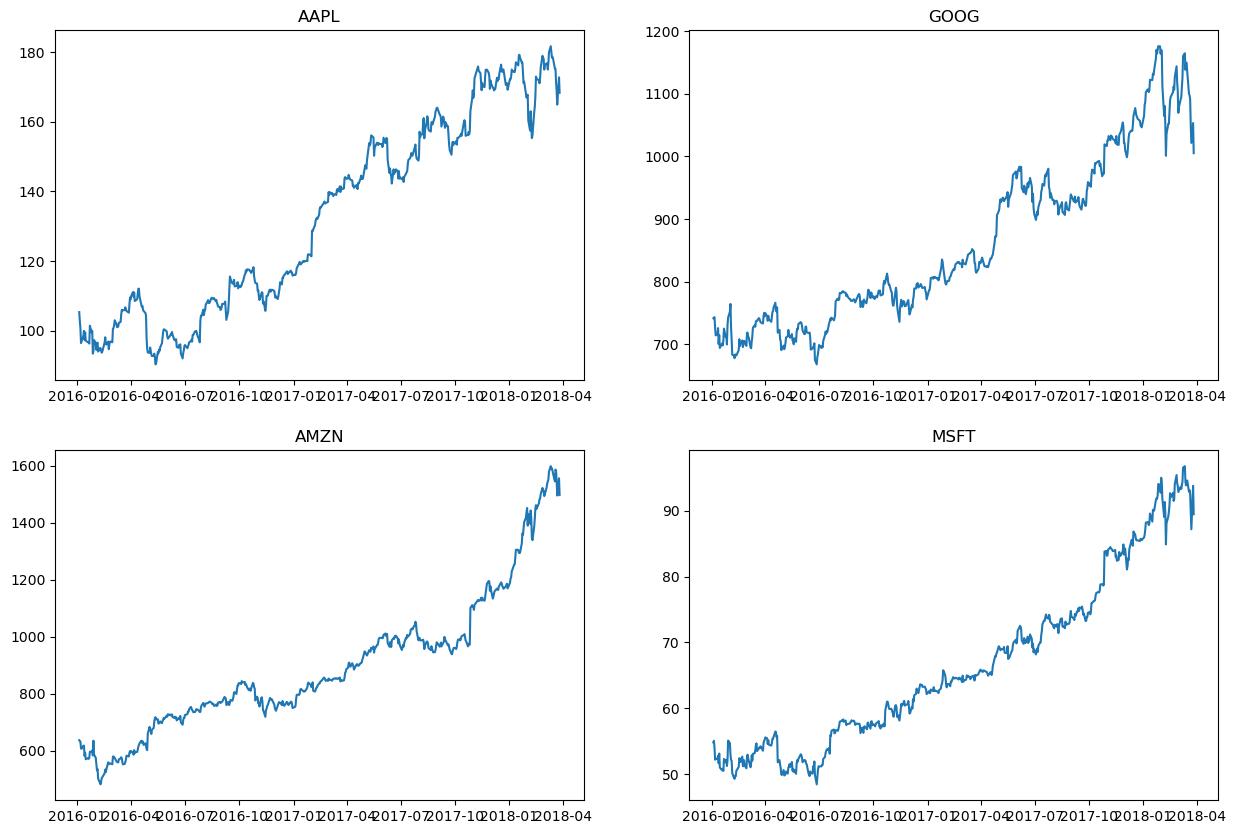

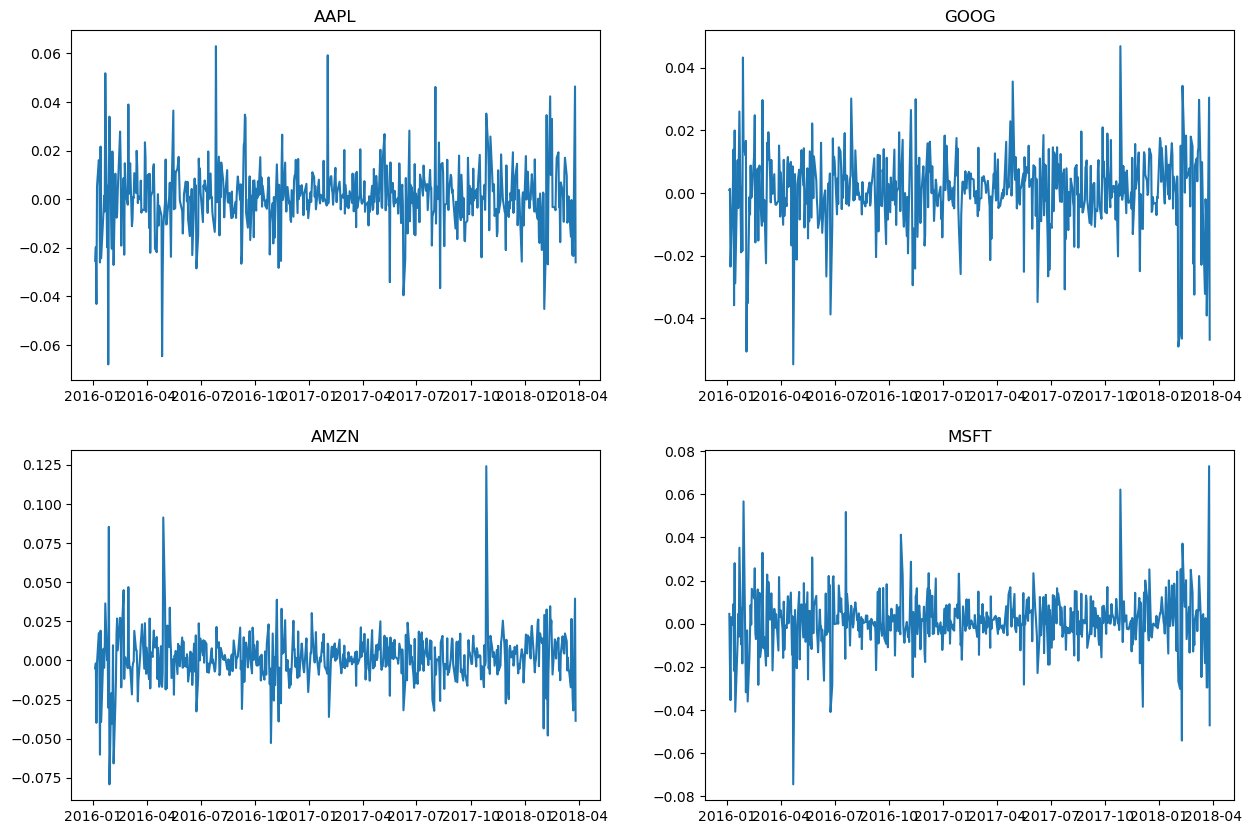

In [6]:
import matplotlib.pyplot as plt

# Plot the stock prices
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, stock in enumerate(stocks):
    row = i // 2
    col = i % 2
    axs[row, col].plot(df[stock])
    axs[row, col].set_title(stock)

plt.show()

# Plot the log returns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, stock in enumerate(stocks):
    row = i // 2
    col = i % 2
    axs[row, col].plot(log_returns[stock])
    axs[row, col].set_title(stock)

plt.show()


## -->Implement and evaluate ARIMA and SARIMA models to forecast the future values of the time series:

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
train_size = int(len(log_returns) * 0.8)
train, test = log_returns[:train_size], log_returns[train_size:]

# Fit an ARIMA model for each stock and compute the predictions
arima_preds = {}
for stock in stocks:
    model = ARIMA(train[stock], order=(2, 1, 2))
    model_fit = model.fit()
    arima_preds[stock] = model_fit.predict(start=len(train), end=len(log_returns)-1)

# Fit a SARIMA model for each stock and compute the predictions
sarima_preds = {}
for stock in stocks:
    model = SARIMAX(train[stock], order=(2, 1, 2), seasonal_order=(0, 1, 1, 7))
    model_fit = model.fit()
    sarima_preds[stock] = model_fit.predict(start=len(train), end=len(log_returns)-1)

# Evaluate the performance of the models
arima_scores = {}
sarima_scores = {}
for stock in stocks:
    arima_scores[stock] = {
        "mse": mean_squared_error(test[stock], arima_preds[stock]),
        "rmse": np.sqrt(mean_squared_error(test[stock], arima_preds[stock])),
        "mae": mean_absolute_error(test[stock], arima_preds[stock]),
        "r2": r2_score(test[stock], arima_preds[stock])
    }
    sarima_scores[stock] = {
        "mse": mean_squared_error(test[stock], sarima_preds[stock]),
        "rmse": np.sqrt(mean_squared_error(test[stock], sarima_preds[stock])),
        "mae": mean_absolute_error(test[stock], sarima_preds[stock]),
        "r2": r2_score(test[stock], sarima_preds[stock])
    }


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55416D+00    |proj g|=  4.06595D-01

At iterate    5    f= -2.64809D+00    |proj g|=  5.19594D-01

At iterate   10    f= -2.65213D+00    |proj g|=  1.36772D+00

At iterate   15    f= -2.67526D+00    |proj g|=  7.20036D-01

At iterate   20    f= -2.70571D+00    |proj g|=  3.05265D+00

At iterate   25    f= -2.79910D+00    |proj g|=  7.05816D-01

At iterate   30    f= -2.81000D+00    |proj g|=  1.53656D-01

At iterate   35    f= -2.81019D+00    |proj g|=  9.76015D-02
  ys=-8.700E-06  -gs= 1.556E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters f


At iterate    5    f= -2.64011D+00    |proj g|=  1.65915D+01

At iterate   10    f= -2.79611D+00    |proj g|=  8.83848D-01

At iterate   15    f= -2.80116D+00    |proj g|=  3.47692D+00

At iterate   20    f= -2.87042D+00    |proj g|=  5.47538D+00

At iterate   25    f= -2.87666D+00    |proj g|=  7.40695D-01

At iterate   30    f= -2.92600D+00    |proj g|=  1.97378D+01

At iterate   35    f= -2.95880D+00    |proj g|=  5.50787D+00

At iterate   40    f= -2.96510D+00    |proj g|=  6.60903D-01

At iterate   45    f= -2.96539D+00    |proj g|=  2.79018D-01


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/sit


At iterate   50    f= -2.96541D+00    |proj g|=  1.63323D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   1.633D-01  -2.965D+00
  F =  -2.9654087869509369     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.27159D+00    |proj g|=  3.25784D+00

At iterate    5    f= -2.29891D+00    |proj g|=  1.29325D+01

At iterate   10    f= -2.54812D+00    |proj g|=  1.89193D-01

At iter

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/a


At iterate    5    f= -2.54070D+00    |proj g|=  1.54281D+01

At iterate   10    f= -2.72269D+00    |proj g|=  1.02752D+00

At iterate   15    f= -2.72880D+00    |proj g|=  2.32205D+00

At iterate   20    f= -2.80055D+00    |proj g|=  2.25321D+01

At iterate   25    f= -2.88383D+00    |proj g|=  1.38435D+00

At iterate   30    f= -2.90812D+00    |proj g|=  1.54193D+00

At iterate   35    f= -2.91151D+00    |proj g|=  7.51861D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     60      1     0     0   7.519D-02  -2.912D+00
  F =  -2.9115078867075406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In this code, we split the log returns data into training and testing sets, fit an ARIMA model and a SARIMA model for each stock, and compute the predictions for the testing set. We then evaluate the performance of each model using various metrics such as mean squared error, root mean squared error, mean absolute error, and coefficient of determination.

Finally, let's compare the performance of the ARIMA and SARIMA models:

In [8]:
print("ARIMA scores:")
for stock, scores in arima_scores.items():
    print(f"{stock}: MSE={scores['mse']:.4f}, RMSE={scores['rmse']:.4f}, MAE={scores['mae']:.4f}, R2={scores['r2']:.4f}")
print()
print("SARIMA scores:")
for stock, scores in sarima_scores.items():
    print(f"{stock}: MSE={scores['mse']:.4f}, RMSE={scores['rmse']:.4f}, MAE={scores['mae']:.4f}, R2={scores['r2']:.4f}")


ARIMA scores:
AAPL: MSE=0.0002, RMSE=0.0146, MAE=0.0107, R2=0.0002
GOOG: MSE=0.0003, RMSE=0.0159, MAE=0.0109, R2=-0.0023
AMZN: MSE=0.0004, RMSE=0.0191, MAE=0.0124, R2=-0.0201
MSFT: MSE=0.0003, RMSE=0.0167, MAE=0.0107, R2=0.0001

SARIMA scores:
AAPL: MSE=0.0002, RMSE=0.0146, MAE=0.0106, R2=-0.0035
GOOG: MSE=0.0003, RMSE=0.0163, MAE=0.0114, R2=-0.0567
AMZN: MSE=0.0004, RMSE=0.0191, MAE=0.0124, R2=-0.0262
MSFT: MSE=0.0003, RMSE=0.0169, MAE=0.0107, R2=-0.0241


## -->This code prints out the evaluation metrics for each model. Based on these metrics, we can select the best model for each stock.